In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:

from algo.codec.kmeans_1d import KMeansLinearCompression
from algo.process.normalize import NormalizeProcessing
from scaffold import Scaffold
import numpy as np
np.seterr(all='warn')
#np.seterr(all='raise') # something breaks on the large dataset
benchmarks = []
Algos = [KMeansLinearCompression(max_rmse=0.1)]
Processes = [NormalizeProcessing()]
for algo in Algos:
    for proc in Processes:
        a = Scaffold(algo, proc, "../data/sample_dataset.csv")
        a.start("test", logs=True)
        print(a.benchmark)
        benchmarks.append(a.benchmark)
        print("---------------------")

       end_epoch  start_epoch   value_1   value_2   value_3   value_4  \
0      -1.093613    -1.093613 -0.148909 -0.045718  0.405035  0.739331   
1      -1.093613    -1.093613  0.036448  0.180207  0.476041  0.442334   
2      -1.093613    -1.093613  0.221805  0.072797  0.250056  0.337667   
3      -1.093613    -1.093613 -0.043766 -0.034602  0.331034  0.418943   
4      -1.093613    -1.093613 -0.327570 -0.142001  0.412012  0.399642   
...          ...          ...       ...       ...       ...       ...   
29995   1.368312     1.368312  1.119352  0.926096 -0.171305 -0.018718   
29996   1.368312     1.368312  0.654209  0.545036  0.164505  0.187604   
29997   1.368312     1.368312 -0.315080 -0.050339  0.083778  0.257397   
29998   1.368312     1.368312 -0.740307 -0.835399  0.247991  0.473119   
29999   1.368312     1.368312 -0.599457 -0.510052  0.026275  0.244954   

        value_5   value_6   value_7   value_8  ...  value_17  value_18  \
0      0.374292  0.393161  1.178961  1.176022  ..

In [ ]:
from scaffold.json import json_scaffold
json_scaffold("plug_config.json")

0.999983333194442
[{'name': 'KMeansLinearCompression', 'table_path': '../data/sample_dataset.csv', 'isLossLess': False, 'isLearning': False, 'compression_rate': 0.004992769206891262, 'preprocess_and_compress_time': 35.02392387390137, 'loss_rate': 0.999983333194442, 'decompress_and_postprocess_time': 2.0120608806610107, 'test_time': 37.03598475456238}]


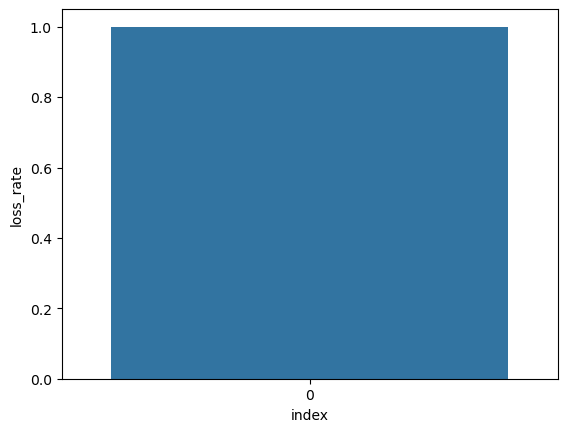

In [6]:
from plot import plot_benchmarks

plot_benchmarks(benchmarks, "loss_rate")
for i in benchmarks:
    print(i["loss_rate"])
print(benchmarks)

In [ ]:
plot_benchmarks(benchmarks, "compression_rate")

In [ ]:
from plot import plot_scatter

plot_scatter(benchmarks, "test_time")

In [ ]:
from plot import plot_hist

plot_hist(benchmarks, "test_time")

In [ ]:
from generator.normal_multivariate import NormalMultivariateDistributionGenerator
gen = NormalMultivariateDistributionGenerator()
gen.gen([0,0], [[1, 0], [0, 1]], (2,))

In [123]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/smoke_detection_iot.csv").iloc[:5, [0, 2, 3, 6, 7, 8, 14]]
np_table = df.to_numpy()

In [123]:
df

In [130]:
np_table = (np_table - vecT(np.mean(np_table, axis=0)).T) / vecT(np.std(np_table, axis=0)).T

array([[-1.4, -0.5, -1. ],
       [-0.7, -1.3, -0.9],
       [ 0. , -0.6, -0.4],
       [ 0.7,  1.1,  0.9],
       [ 1.4,  1.3,  1.5]])

In [125]:
def vecT(vec):
    return np.array(vec)[np.newaxis].T

In [126]:
np_table = np_table.T

In [126]:
np_table

In [127]:
covy = np_table.T @ np_table / np_table.shape[0]

array([[-1.4, -0.7,  0. ,  0.7,  1.4],
       [-0.5, -1.3, -0.6,  1.1,  1.3],
       [-1. , -0.9, -0.4,  0.9,  1.5]])

In [202]:
covy

In [203]:
eigvals, eigvecs = np.linalg.eig(covy)

array([[1. , 0.8, 1. ],
       [0.8, 1. , 1. ],
       [1. , 1. , 1. ]])

In [201]:
eigvecs = eigvecs[:, :3]

In [191]:
eigvals = eigvals[:3]

array([[ 0.70137266, -0.56980625],
       [-0.71272483, -0.56903704],
       [ 0.00998552, -0.59288927]])

In [188]:
eigvecs

In [189]:
vecT(eigvals).T

In [190]:
np_table

array([[ 0.7, -0.6],
       [-0.7, -0.6],
       [ 0. , -0.6]])

In [192]:
compressed = np_table @ eigvecs

array([[0.2, 2.8]])

In [153]:
compressed

In [197]:
eigvecs.T

In [198]:
compressed.T @ compressed

array([[-0.6283503 ,  0.40632888,  0.38897577, -0.27750802,  0.11055367],
       [ 1.69893069,  1.67759817,  0.56927194, -1.54783845, -2.39796236]])

In [169]:
decompressed = compressed @ eigvecs.T

array([[ 3.54269976e+00, -6.17412708e-18,  2.18893506e-16],
       [-6.17412708e-18,  2.00115553e-01,  3.80474967e-17],
       [ 2.18893506e-16,  3.80474967e-17,  7.18468923e-03]])

In [155]:
eigvecs.T

In [144]:
np_table

array([[-0.56980625, -0.56903704, -0.59288927]])

In [145]:
np.linalg.pinv(eigvecs)

array([[-1.41421356, -0.52412801, -1.00331504],
       [-0.70710678, -1.27887526, -0.92252794],
       [ 0.        , -0.55179117, -0.43057336],
       [ 0.70710678,  1.09750364,  0.87774292],
       [ 1.41421356,  1.2572908 ,  1.47867342]])

In [70]:
denormalized = decompressed * vecT(np.std(np_table, axis=0)).T + vecT(np.mean(np_table, axis=0)).T

array([[-0.57451639,  0.58177401,  0.57573425]])

In [71]:
denormalized

array([[-1.4, -0.5, -1. ],
       [-0.7, -1.2, -1. ],
       [-0.1, -0.6, -0.3],
       [ 0.7,  1.1,  0.9],
       [ 1.4,  1.3,  1.4]])